# About the Project

This project presents a comprehensive analysis of India's electric vehicle market, focusing on segmentation derived from sales data, customer reviews, and technical specifications

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


In [90]:
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

Sales Data

The sales data obtained from the Society of Manufactures of Electric Vehicles, spanning 2017 to 2023, catalogues sales figures of electric two-wheelers, three-wheelers, four-wheelers, and buses. This dataset provides a comprehensive view of market trends and customer preferences over time.

In [91]:
data_smev = pd.read_excel('smev_data.xlsx', sheet_name= None)

In [92]:
data_smev.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [93]:
data_smev['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


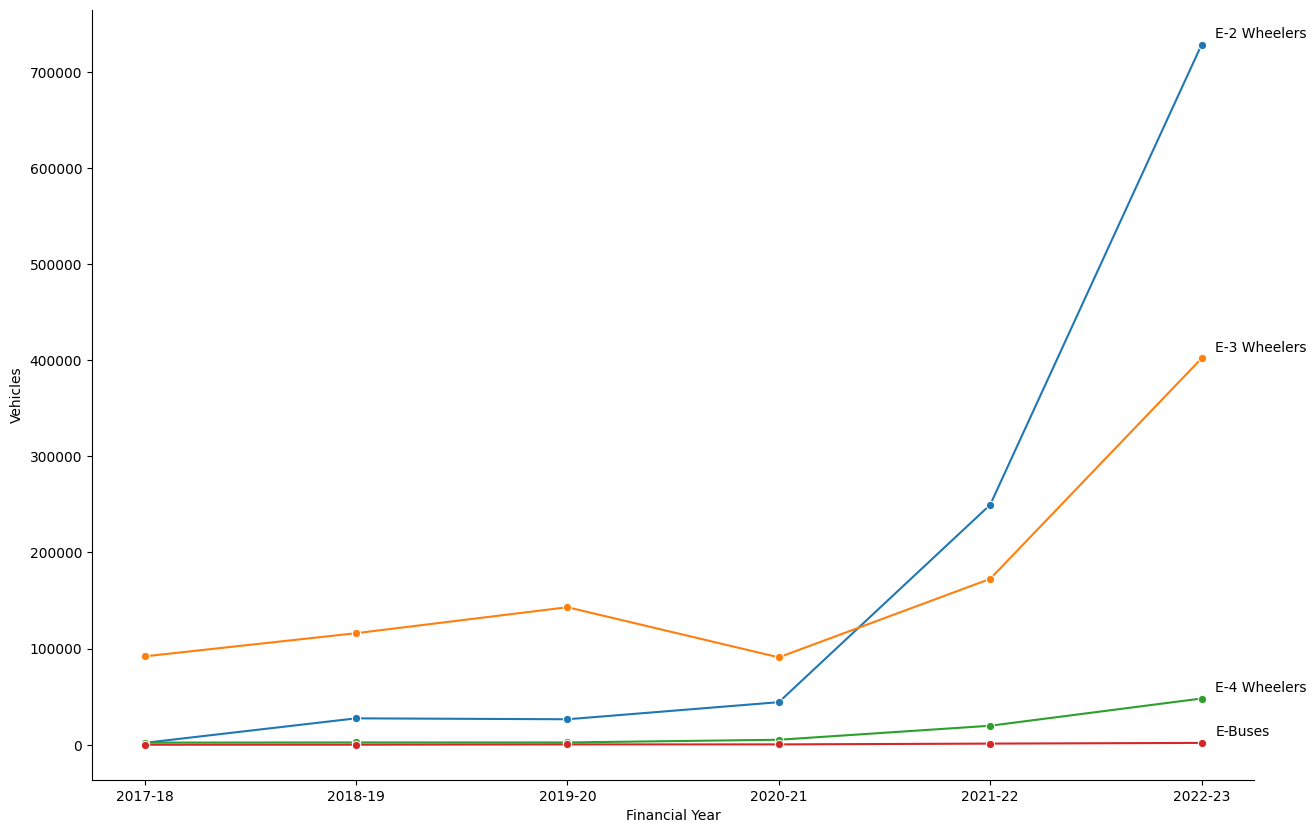

In [94]:
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.lineplot(data=data_smev['EV Industries'], x='financial_year', y='num_vehicles', hue = 'category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")

#Annotate the last data point
for col in data_smev['EV Industries']['category'].unique():
  last_point = data_smev['EV Industries'][data_smev['EV Industries']['category'] == col].iloc[-1]
  plt.annotate(f"{last_point['category']}", (last_point['financial_year'], last_point['num_vehicles']),
               textcoords="offset points",
               xytext=(10,5),
               ha='left')
ax.spines[['right','top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()


In [95]:
data_smev['EV Market'] = data_smev['EV Market'].sort_values('Amount INR Cr', ascending=False)

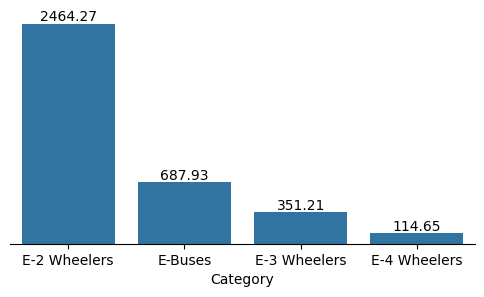

In [96]:
fig, ax = plt.subplots(figsize =(6,3))
ax = sns.barplot(data_smev['EV Market'], x='Category', y='Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right','top','left']].set_visible(False)
plt.show()

Above figure deleved into the market's financial perspective, representing the industry's total value in crores. Notably, two-wheelers emerged as the primary revenue generators, highlighting their economic significance.

In [97]:
ev2w = list(data_smev.keys())[0:4]
data_ev2w = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]] )

In [98]:
data_ev2w['maker'] = data_ev2w['maker'].str.upper()

In [99]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [100]:
np.sort(data_ev2w['maker'].unique())


array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [101]:
data_ev2w['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA','BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH','OKINAWA')

In [102]:
np.sort(data_ev2w['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [103]:
data_ev2w

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [104]:
data_ev2w_year = data_ev2w.groupby(['financial_year','maker']).agg({'num_vehicles':'sum'}).reset_index()

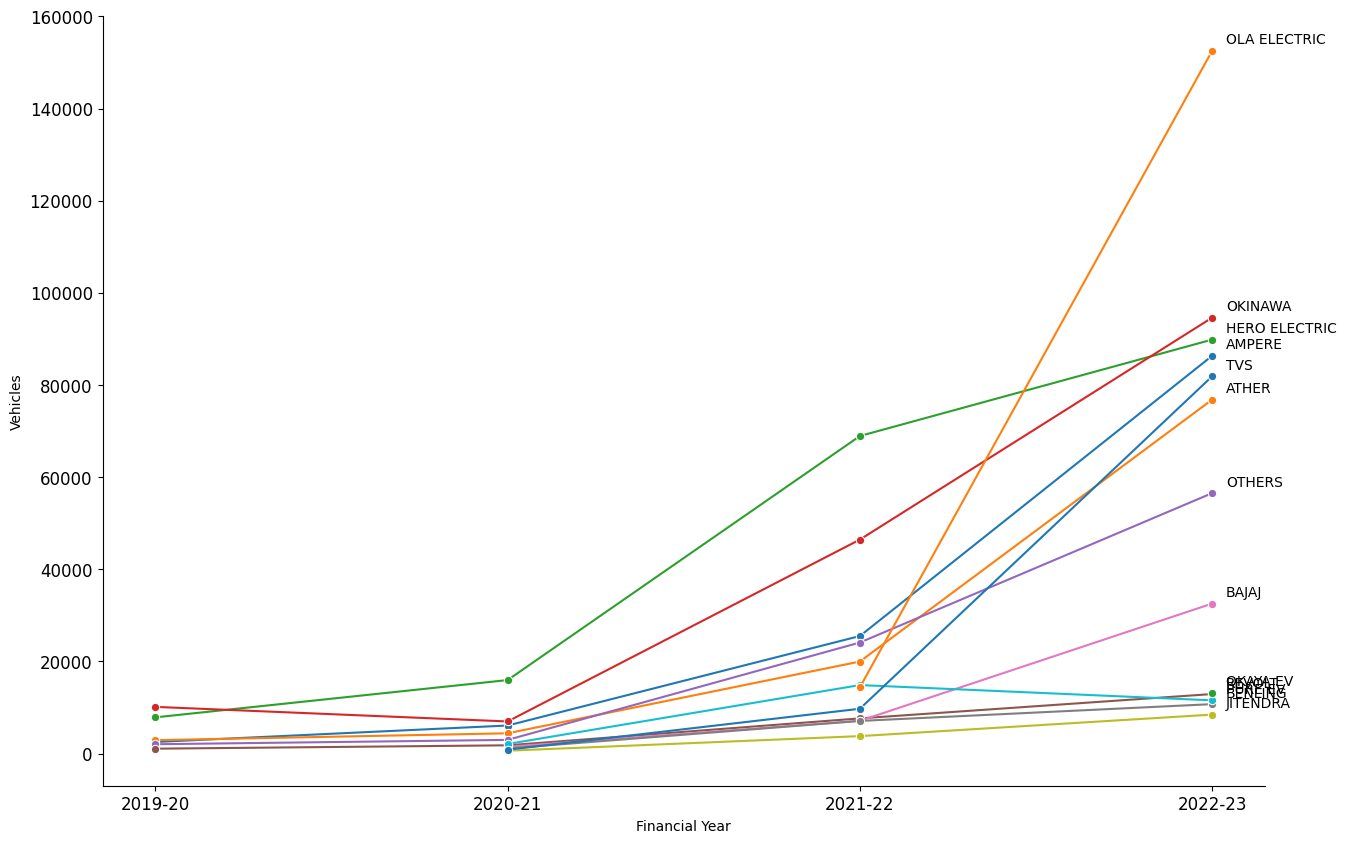

In [105]:
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.lineplot(data=data_ev2w_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

#Annotate the last data point
for col in data_ev2w_year['maker'].unique()[::1]:
  last_point = data_ev2w_year[data_ev2w_year['maker'] == col].iloc[-1]
  plt.annotate(f"{col}", (last_point['financial_year'], last_point['num_vehicles']),
               textcoords="offset points",
               xytext=(10,5),
               ha='left')
ax.spines[['right','top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format='png')
plt.show()


Above figure honed in on specified electric two-wheeler companies, with ola electric emerging as the market leader in 2023, illustrating industry leadership and market competitiveness.

**EV Market Segmentation**



*   The dataset used for the market segmentation analysis, extracted from bikewale.com, comprises electric two-wheeler customer reviews, offering vital behavioural and psychographic insights.
*   It also presents detailed technical specification and pricing information of electric two-wheelers. This data allowed us to assess the technical feasibility and price points crucial for our market segmentation strategy.**bold text**



In [106]:
data_bw = pd.read_csv("ev2_bikewale.csv")
data_model = pd.read_csv("ev_model_spec.csv")

In [107]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [108]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


In [109]:
data = data_bw.merge(data_model, how = 'left', on = 'Model Name')

In [110]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000


<Axes: >

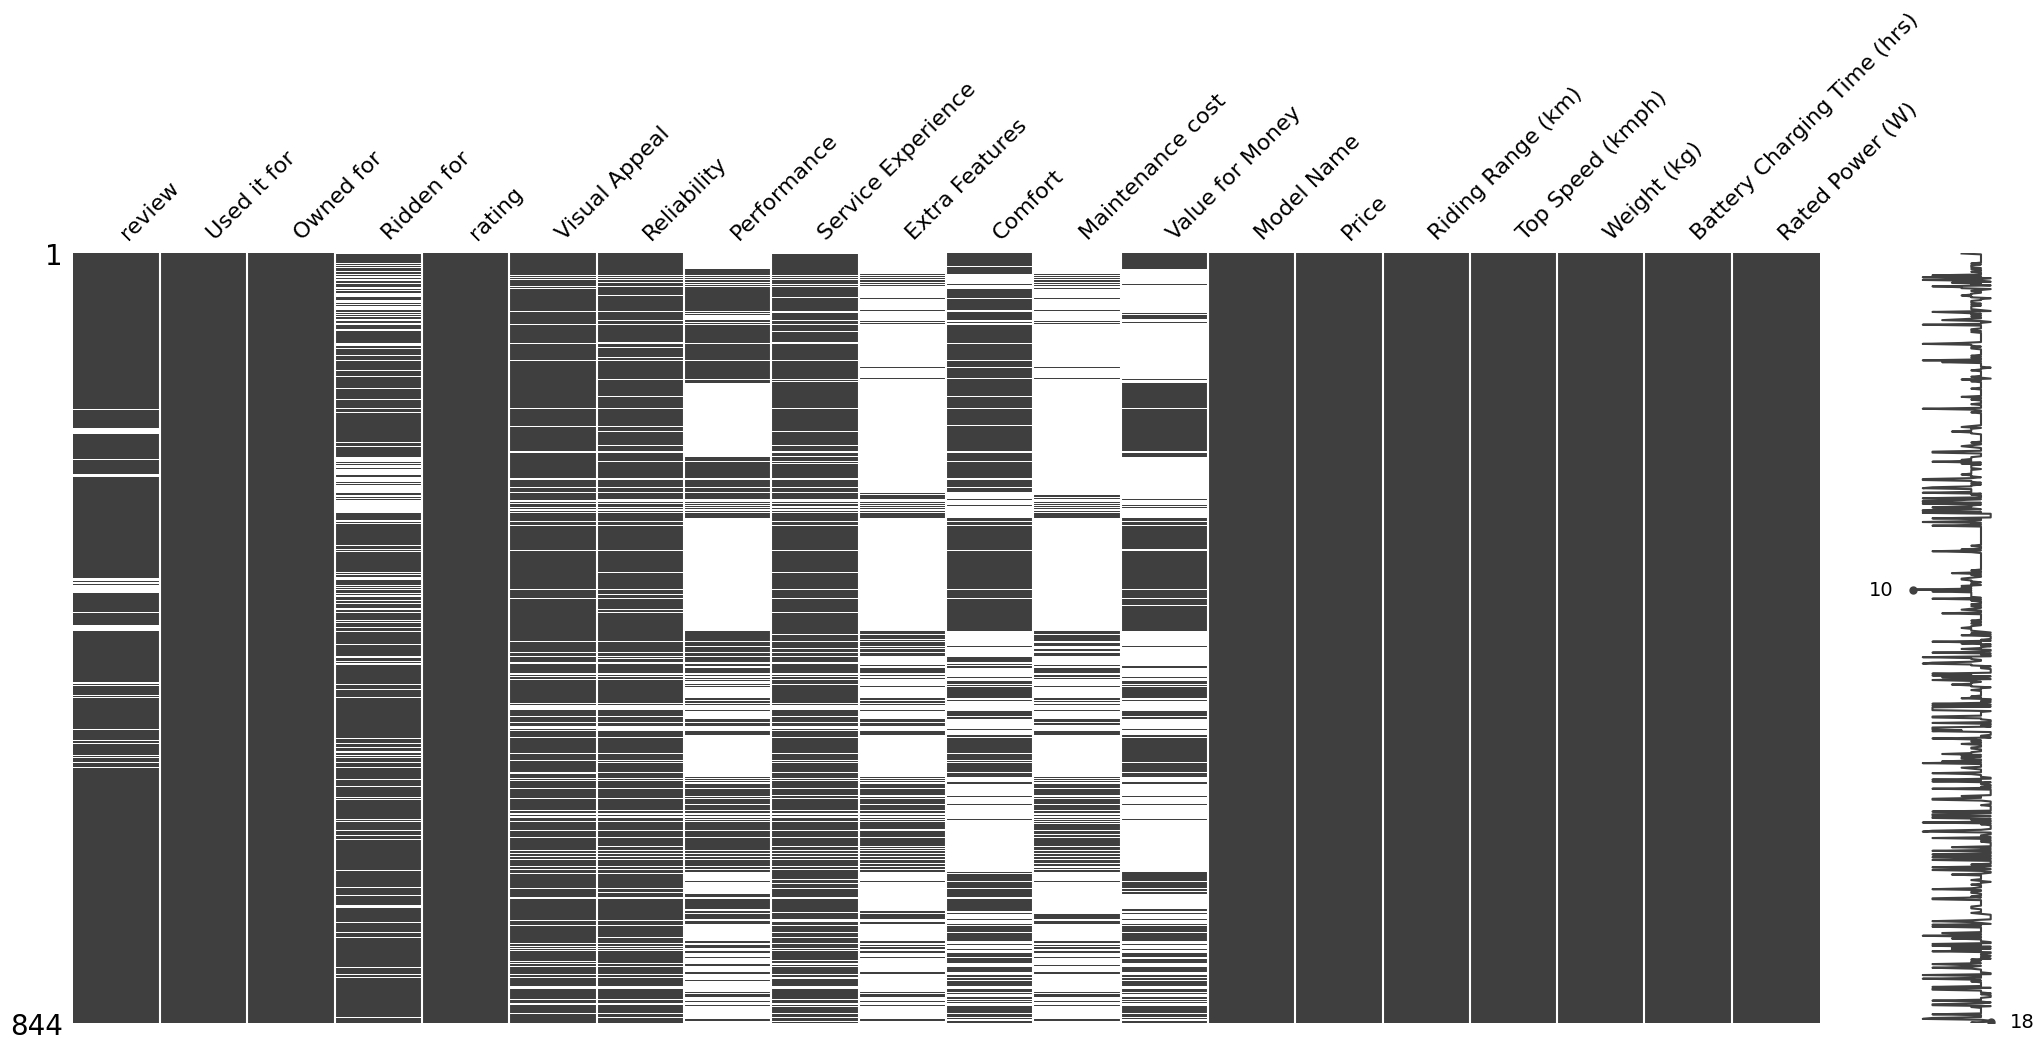

In [111]:
msno.matrix(data)

In [112]:
((data.isnull().sum() * 100/data.shape[0])).sort_values(ascending = False)

,0
Maintenance cost,78.672986
Extra Features,78.080569
Performance,59.123223
Value for Money,53.791469
Comfort,37.203791
Ridden for,20.853081
Service Experience,16.706161
Reliability,15.165877
Visual Appeal,12.440758
review,5.568720


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [114]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data['review']:
  if pd.isna(review_text):
    sentiments_list.append('neutral')
    continue
  sentiment_scores = sentiments.polarity_scores(review_text)

  positive_score = sentiment_scores['pos']
  negative_score = sentiment_scores['neg']

  if positive_score > negative_score:
    sentiment_label = 'positive'
  elif positive_score < negative_score:
    sentiment_label = 'negative'
  else:
    sentiment_label = 'neutral'

  sentiments_list.append(sentiment_label)

data['sentiment'] = sentiments_list

In [115]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [116]:
data['sentiment'].value_counts()

,count
sentiment,
positive,527
negative,264
neutral,53


In [117]:
data_segment = data[['Used it for','Owned for','Ridden for','rating','Visual Appeal','Reliability','Performance','Service Experience','Extra Features','Comfort','Maintenance cost','Value for Money','sentiment']].copy()

In [118]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [119]:
data.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [120]:
data_segment = data.iloc[:, 5:13].copy()


In [121]:
data_segment = data_segment.fillna(0.)

In [122]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 52.9 KB


In [123]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [124]:
pca = PCA(random_state=42)
pca.fit(data_scaled)

PCA(random_state=42)

In [125]:
data_pca = pca.transform(data_scaled)

In [126]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x+1}' for x in range(len(data_segment.columns))])

In [127]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-0.291227,-1.038055,0.354864,0.623469,1.102720,0.169287,0.438012,-0.957827
1,-0.710801,-1.394405,-0.360466,0.621671,-0.320899,0.086053,0.426279,0.149917
2,0.849149,-1.189765,0.167683,0.410898,0.409054,0.191904,0.329993,-0.830738
3,-1.967022,-0.878935,-0.100197,-0.330003,0.075822,-0.069599,-0.013068,-0.011328
4,-0.078940,-1.017161,-0.079210,0.324132,0.961554,-0.005517,0.107260,-0.427972


In [128]:
pca_summary = pd.DataFrame({'Standard Deviation': pca.explained_variance_, 'Proportion of Variance': pca.explained_variance_ratio_, 'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)})

In [129]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumulative Proportion
0,3.404088,0.425007,0.425007
1,3.015940,0.376546,0.801553
2,0.816287,0.101915,0.903468
3,0.268065,0.033468,0.936936
4,0.164219,0.020503,0.957439
5,0.144064,0.017987,0.975426
6,0.114165,0.014254,0.989680
7,0.082662,0.010320,1.000000


In [130]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns)

In [131]:
factor_loadings.style.background_gradient(cmap='coolwarm')

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,0.480170,0.494758,0.128721,0.486499,0.024373,0.418255,-0.005912,0.309572
1,0.117814,0.124910,0.459145,0.100691,0.519633,-0.304266,0.513208,-0.351548
2,0.063320,-0.002776,0.574833,-0.054176,-0.364578,0.249807,-0.386495,-0.563840
3,0.730598,-0.152447,0.005549,-0.653781,0.023208,0.020111,0.054822,0.107598
4,-0.247014,0.819319,0.019902,-0.470391,-0.116821,-0.172621,-0.020302,0.046688
5,-0.105903,-0.060484,0.025704,-0.052432,-0.559390,0.296656,0.762039,-0.009572
6,-0.375474,-0.117211,0.288468,-0.311210,0.456829,0.623271,0.003360,0.260855
7,-0.067539,-0.166384,0.598232,0.044129,-0.246323,-0.404238,-0.055435,0.617065


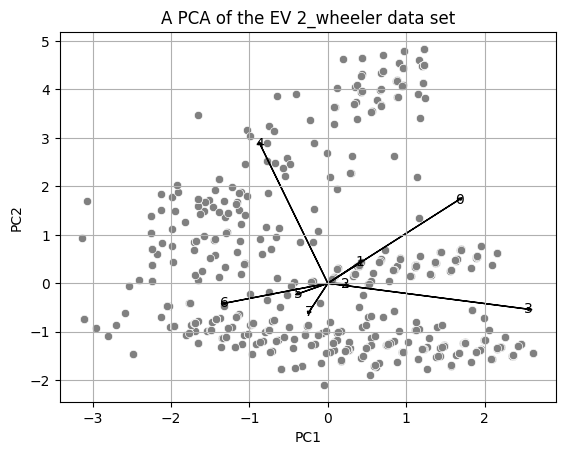

In [132]:
#Calculate centroid
index_names = factor_loadings.index

#Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color='grey')

#Plot arrows from centroid to provided coordinates with index names
# The for loop iterated over the index, 0 to 7, before
# accessing the factor loadings in factor_loadings DataFrame
# using index_names[i] to identify the correct row
for i in range(len(factor_loadings)):
    plt.arrow(0, 0, factor_loadings.loc[i, 'Visual Appeal'] * 3.5, factor_loadings.loc[i, 'Reliability'] * 3.5, head_width=0.05, head_length=0.05, fc='k', ec='k')
    plt.text(factor_loadings.loc[i, 'Visual Appeal']* 3.5, factor_loadings.loc[i, 'Reliability']* 3.5, index_names[i], ha='center', va='center')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A PCA of the EV 2_wheeler data set')
plt.grid(True)
plt.savefig('pca.png', format='png')
plt.show()

In [133]:
data_km28 = [KMeans(n_clusters = k, random_state = 42).fit(df_pca) for k in range(1,9)]

In [134]:
wcss = [model.inertia_ for model in data_km28]

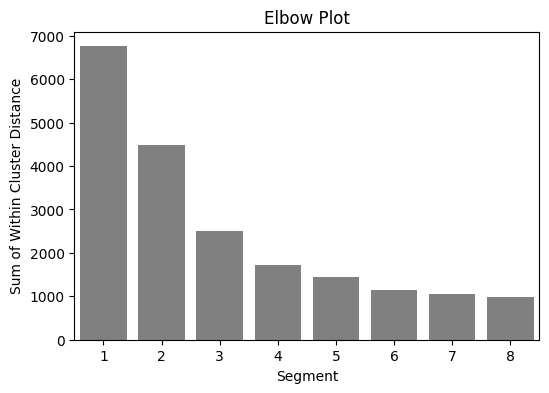

In [135]:
fig = plt.figure(figsize = (6,4))
# Adjust the x-axis values to match the length of wcss
sns.barplot(x= list(range(1,9)), y = wcss, color='grey')
plt.xlabel('Segment')
plt.ylabel('Sum of Within Cluster Distance')
plt.title('Elbow Plot')
plt.savefig('elbow.png', format='png')
plt.show()

In [136]:
kmeans = data_km28[2]

In [137]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [138]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

Profiling Segments

In [139]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [140]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [141]:
data_pivot_mean = data_pivot.mean(axis=1).reset_index()
data_pivot_mean.columns = ['Variable','Value']

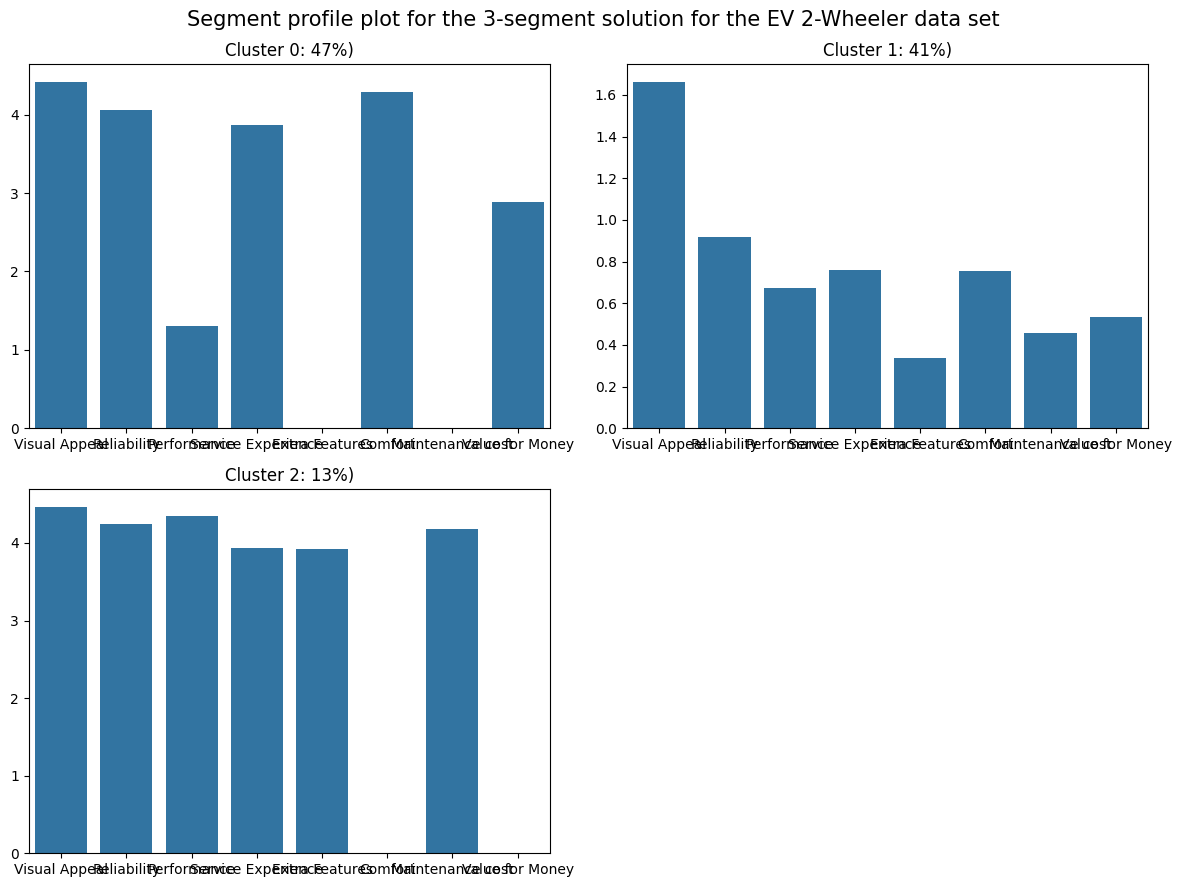

In [142]:
plt.figure(figsize = (12,9))
for i in range(3):  # Changed range to 3 to match cluster numbers
    plt.subplot(2,2,i+1)
    sns.barplot(data=data_pivot, x=data_pivot.index, y=data_pivot[i])  # Pass data_pivot to data, x as index, y as the cluster column
    # sns.scatterplot(data_pivot_mean, x="Value", y='Variable', color='red')  # Removed scatterplot for clarity
    # for index, row in data_pivot_mean.iterrows():
    #     plt.hlines(y=row['variable'], xmin=0, xmax=row['Value'], colors='red', alpha=0.2)  # Removed hlines for clarity
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i] * 100 / len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the 3-segment solution for the EV 2-Wheeler data set", fontsize=15)  # Changed subtitle to 3-segment
plt.tight_layout()
plt.savefig('segment_profile.png')
plt.show()

KeyError: 'PC1'

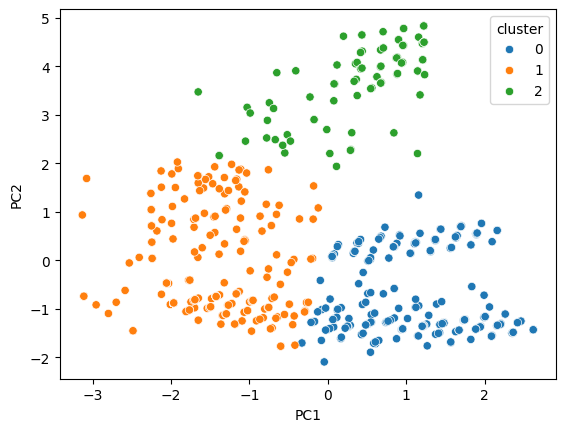

In [143]:
#Calculate centroid
index_names = factor_loadings.index

#Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette='tab10')

#Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
  plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.05, fc='k', ec='k')
  plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, index_names[i], ha='center', va='center')

#Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using PC 1 and 2')
plt.grid(True)
plt.savefig('segment_separation.png')
plt.show()

Describing Segments

In [144]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [145]:
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [146]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth=1, title = "Simple Mosaic Plot", xlabel="cat"):
  fig, ax = plt.subplots(figsize= figsize)

  #Convert to ratio of each row sum and do a cumsum along row
  p_cnt_ratio_df = df.div(df.sum(1), axis=0)
  ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)

  #Get column order
  col_order = ratio_cum_df.columns.tolist()
  x = [str(n) for n in ration_cum_df.index.tolist()]

  #Do the actual plots
  for col, color in zip(col_order[::-1], color_list):
    plt.bar(x, ratio_cum_df[col], color=color, edgecolor='white', width=barwidth, label=col)

  #Add in legend
  plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

  #Configure title and axis
  plt.title(title)
  plt.xlabel("Segments")
  ax.spines["right"].set_visible(False)
  ax.spines["left"].set_visible(False)
  ax.spines["top"].set_visible(False)
  plt.yticks([])
  plt.show()

In [147]:
color_list =['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [148]:
sentiment_cluster = pd.crosstab(data_desc['cluster'], data_desc['sentiment'])

In [149]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,41,45,307
1,207,8,127
2,16,0,93


In [150]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth=1, title = "Simple Mosaic Plot", xlabel="cat"):
  fig, ax = plt.subplots(figsize= figsize)

  #Convert to ratio of each row sum and do a cumsum along row
  p_cnt_ratio_df = df.div(df.sum(1), axis=0)
  ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)



In [151]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns= data_desc['Used it for'])

In [152]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,260,93,11,27,2
1,254,48,7,28,5
2,86,19,2,1,1


In [153]:
owned_cluster = pd.crosstab(index= data_desc['cluster'], columns = data_desc['Owned for'])

In [154]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,56,65,102,65,105,0
1,41,56,75,118,51,1
2,14,13,43,20,19,0


In [155]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [156]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,12,58,202,16,0
1,15,62,195,17,1
2,5,18,62,5,0


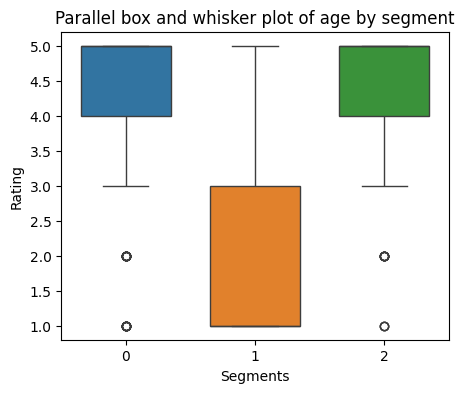

In [157]:
#Number of clusters along the x-axis and rating along the y-axis
plt.figure(figsize = (5,4))
sns.boxplot(data_desc, x="cluster",y="rating", palette ='tab10', width=0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig('parallel_box.png')
plt.show()

In [158]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive,0
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative,0


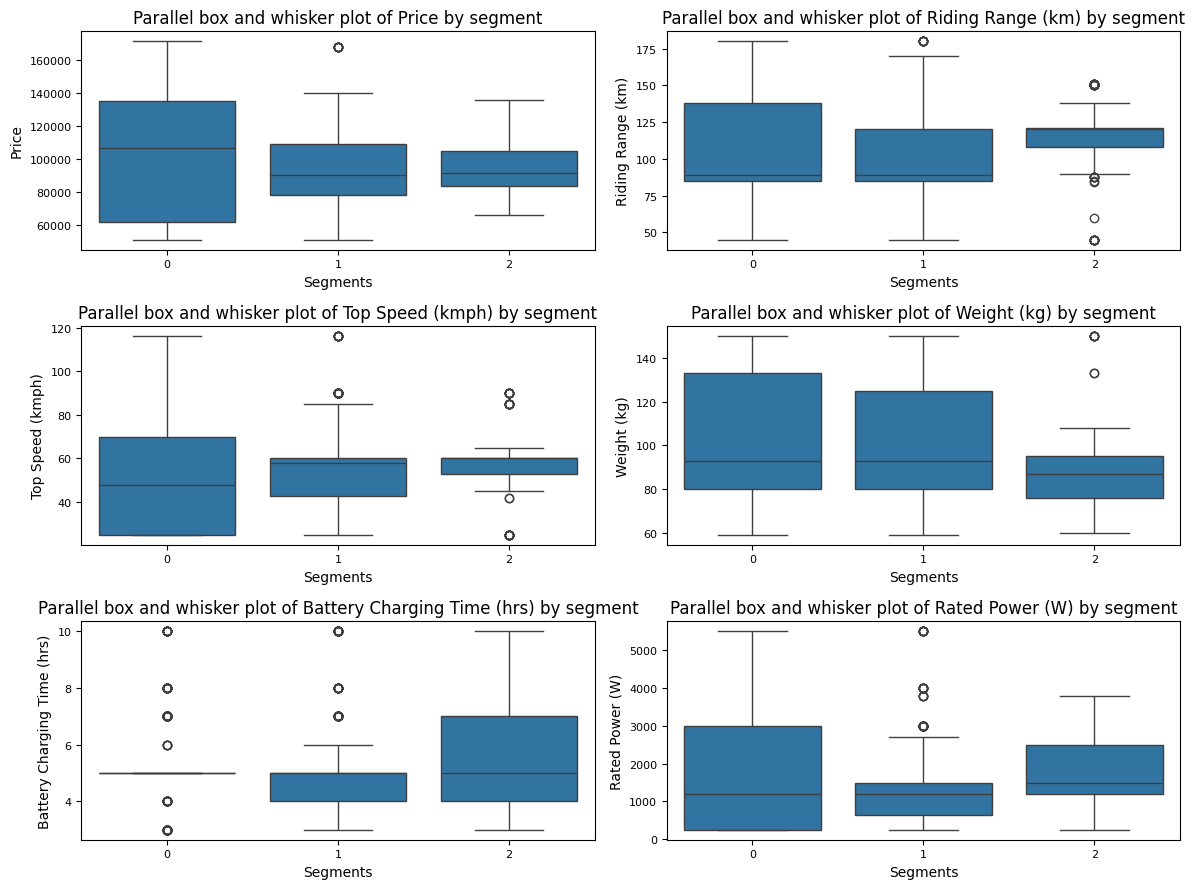

In [159]:
plt.figure(figsize= (12,9))
for i, col in enumerate(data_desc.columns[-8:-2]):
  plt.subplot(3,2,i+1)
  sns.boxplot(data_desc, x = 'cluster', y=col)
  plt.xlabel("Segments", fontsize= 10)
  plt.ylabel(col, fontsize = 10)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)
  plt.title(f"Parallel box and whisker plot of {col} by segment")
plt.tight_layout()
plt.show()


In analyzing technical specification
of electric vehicles across different segments, distinct patterns emerge. Segment 0 prefers premium EVs with a higher price range and extended riding range, emphasizing consumer preference for luxury and long-distance travel. Segment 1 focuses on budget friendly options with lower prices and moderate riding ranges, suitable for daily commuting. Segment 2 and Segment 3 prioritize affordability, with slight differences in riding range and speed preferences. Weight preferences vary, with Segment 0 and Segment 1 favoring heavier vehicles, while Segment 2 and Segment 3 prefer lighter options. Charging time also differs, with Segment 0 and Segment 3 opting for longer durations for overnight charging, while Segment 1 and Segment 2 prioritize faster charging for quick turnaround times. These nuanced preferences shape the electric vehicle market in India.

# Selection of Target Segment

The strategic target segments for the electric vehicle market are identified as Segment 1 (39% of consumers) and Segment 2 (33% of consumers). Segment 1's diverse preferences and dissatisfaction points present an opportunity for improving customer satisfaction and loyalty by directly addressing their specific demands. Segment 2 values visual appeal, reliability, service experience, and comfort, offering a chance to customize electric vehicles to meet these expectations and emphasize value for money. The strategy involves addressing dissatisfaction points in Segment 1 and enhancing positive elements in Segment 2, aligning electric vehicles with the distinct expectations of each segment to ensure competitive advantage and sustained market growth.

# Customizing the Marketing Mix

In our electric vehicle market strategy, customization of the marketing mix is crucial for appealing to Segment 1 and Segment 2, our target segments.


*   Product customization invloves enhancing features based on specific desires, addressing dissatisfaction points for Segment 1, and emphasizing visual appeal and value for money for Segment 2. Diverse offerings cater to varied tastes and budgets within each segment.
*   Price customization includes competitive pricing for segment 1 and a slightly higher price point for value-added features in segment 2.

*  Promotion customization focuses on targeted advertising and tailored promotional events for each segment's preferences.
*   Place customization establishes accessible distribution channels in urban areas for Segment 1 and suburban/semi-urban regions for Segment 2, with a strong emphasis on online presence and customer support.

*  People and Process Customization involves training customer service representatives to address segment-specific concerns and ensuring efficient processes for customization requests and service appointments. This tailored approach ensures our electric vehicles align with the distinct needs of Segment 1 and Segment 2, enhancing market relevance and customer preference.








# Potential Early Market Customer Base

In the analysis of the early market customer base, two primary segments are identified: Segment 1 with 330 members (39% of consumers) and Segment 2 with 277 members (33% of consumers). The target price range for Segment 1 falls between ₹51,094 and ₹1,67,844, and for Segment 2, it ranges from ₹51,094 to ₹1,37,890. By multiplying the number of potential customers in each segment by the targeted price range, potential profits can be calculated. For example, with a target price of ₹1,20,000 for Segment 1, the potential profit amounts to ₹39.60 crores, and for Segment 2 with a target price of ₹1,10,000, the potential profit is ₹30.47 crores. Segment 1, being larger in potential market share, is the primary focus for early market penetration efforts due to its significant profit opportunity.

# Most Optimal Market Segments

After thorough analysis and evaluation, Segment 1, constituting 39% of consumers, has been identified as the optimal market segment for electric two-wheeler vehicles. With a significant customer base and a balanced blend of technical specifications and price range, this segment offers substantial market potential. The recommended technical specifications for Segment 1 include a price range of ₹70,688 to ₹1,29,063, riding range of 89 to 180 km, top speed of 58 to 116 kmph, weight of 76 to 120 kg, battery charging time of 3 to 5 hours, and rated power of 1200 to 5500 W. This targeted approach ensures alignment with the diverse needs and preferences of the market, laying the foundation for a successful and sustainable venture into the electric vehicle market.

# Conclusion


In summary, our in-depth analysis of India's electric vehicle market led us to identify Segment 1 as the optimal target. With a significant 39% consumer base, this segment represents a substantial market opportunity. By tailoring our electric two-wheeler specifications to meet the preferences of this segment, we ensure our products align seamlessly with the demands of a large customer base. This strategic decision is grounded in a thorough understanding of market segmentation, consumer behavior, and technical specifications. These insights provide a clear direction for our market entry, emphasizing precision and relevance in both product development and marketing strategies. Moving forward, this approach equips us with a solid foundation, ensuring our offerings resonate effectively within India's evolving electric vehicle landscape.

**Thank You!**